In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, delimiter='|')
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
def male_ratio(group):
    male_count = (group['gender'] == 'M').sum()
    total_count = group['gender'].count()
    return male_count / total_count
male_ratio = users.groupby('occupation').apply(male_ratio)
male_ratio = male_ratio.sort_values(ascending=False)
minmax = users.groupby('occupation')['age'].agg(['min', 'max'])
mean_age = users.groupby(['occupation', 'gender'])['age'].mean()
def gender_percentage(group):
    total_count = group['gender'].count()
    female_count = (group['gender'] == 'F').sum()
    male_count = total_count - female_count
    return {
        'percentage_female': (female_count / total_count) * 100,
        'percentage_male': (male_count / total_count) * 100
    }
gender_percentage = users.groupby('occupation').apply(gender_percentage)
print("Mean age per occupation:\n", mean_age)
print("\nMale ratio per occupation (sorted):\n", male_ratio)
print("\nMinimum and maximum ages per occupation:\n", minmax)
print("\nMean age per occupation and gender:\n", mean_age)
print("\nGender percentage per occupation:\n", gender_percentage)

Mean age per occupation:
 occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
program

Question 2:
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start
with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)
goal_column = euro12['Goals']
teams = euro12['Team'].nunique()
columns = euro12.shape[1]
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
yellow_cards = euro12['Yellow Cards'].mean()
high = euro12[euro12['Goals'] > 6]
teamsG = euro12[euro12['Team'].str.startswith('G')]
first7 = euro12.iloc[:, :7]
columns3 = euro12.iloc[:, :-3]
accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print("Number of teams:", teams)
print("Number of columns:", columns)
print("Mean Yellow Cards:", yellow_cards)
print("\nHigh Scoring Teams:\n", high)
print("\nTeams starting with 'G':\n", teamsG)
print("\nFirst 7 columns:\n", first7)
print("\nColumns except last 3:\n", columns3)
print("\nShooting Accuracy for selected teams:\n", accuracy)

Number of teams: 16
Number of columns: 35
Mean Yellow Cards: 7.4375

High Scoring Teams:
        Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0      

In [3]:
import pandas as pd
import numpy as np

s1 = pd.Series(np.random.randint(1, 5, size=100)) 
s2 = pd.Series(np.random.randint(1, 4, size=100)) 
s3 = pd.Series(np.random.randint(10000, 30001, size=100))  
data = pd.concat([s1, s2, s3], axis=1)
data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
bigcolumn = pd.DataFrame(pd.concat([s1, s2, s3], axis=0))
print(bigcolumn.index.max() == 99) 
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn.index = range(300)
print("DataFrame 'data':\n", data)
print("\nDataFrame 'bigcolumn':\n", bigcolumn)

True
DataFrame 'data':
     bedrs  bathrs  price_sqr_meter
0       2       2            12018
1       4       3            29915
2       4       3            29123
3       4       3            26774
4       2       1            13899
..    ...     ...              ...
95      3       3            24924
96      4       3            26766
97      3       3            23937
98      1       3            18189
99      4       1            21130

[100 rows x 3 columns]

DataFrame 'bigcolumn':
          0
0        2
1        4
2        4
3        4
4        2
..     ...
295  24924
296  26766
297  23937
298  18189
299  21130

[300 rows x 1 columns]


In [4]:
import pandas as pd
import numpy as np
url = "wind.txt"
data = pd.read_table(url, delim_whitespace=True, na_values='NaN')
data.index = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
data = data.drop(['Yr', 'Mo', 'Dy'], axis=1)
def fix_year(year):
    if year >= 2000:
        year -= 100
    return year
data.index = data.index.map(lambda x: x.replace(year=fix_year(x.year)))
missing_values = data.isnull().sum()
nmissing_values = data.notnull().sum().sum()
mean = data.mean().mean()
loc_stats = data.agg(['min', 'max', 'mean', 'std'], axis=0)
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
january_avg = data.resample('M').mean()
january_avg = january_avg[january_avg.index.month == 1]
yresampled = data.resample('Y').mean()
mresampled = data.resample('M').mean()
wresampled = data.resample('W-MON').mean()
wstats = wresampled.head(52).agg(['min', 'max', 'mean', 'std'], axis=1)
print("Missing values per location:\n", missing_values)
print("\nTotal non-missing values:", nmissing_values)
print("\nMean windspeed over all locations and times:", mean)
print("\nLocation statistics:\n", loc_stats)
print("\nDay statistics:\n", day_stats)
print("\nJanuary average windspeed:\n", january_avg)
print("\nYearly resampled data:\n", yresampled)
print("\nMonthly resampled data:\n", mresampled)
print("\nWeekly resampled data:\n", wresampled)
print("\nWeekly statistics for the first 52 weeks:\n", wstats)

Missing values per location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total non-missing values: 78857

Mean windspeed over all locations and times: 10.227982360836938

Location statistics:
             RPT        VAL        ROS        KIL        SHA        BIR  \
min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
mean   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079  
std    4.977555   4.499449   4.166872   4.503954   5.835037   6.6

In [5]:
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
data = pd.read_csv(url, sep='\t')
print("First 10 entries:\n", data.head(10))
print("\nNumber of observations:", len(data))
print("\nNumber of columns:", len(data.columns))
print("\nColumn names:\n", data.columns)
print("\nIndexing of the dataset:\n", data.index)
most_ordered_item = data['item_name'].value_counts().idxmax()
print("\nMost-ordered item:", most_ordered_item)

most_ordered_item_count = data[data['item_name'] == most_ordered_item]['quantity'].sum()
print("\nNumber of items ordered for the most-ordered item:", most_ordered_item_count)

most_ordered_choice_description = data['choice_description'].value_counts().idxmax()
print("\nMost ordered item in the choice_description column:", most_ordered_choice_description)

total_items_ordered = data['quantity'].sum()
print("\nTotal number of items ordered:", total_items_ordered)

data['item_price'] = data['item_price'].apply(lambda x: float(x[1:].replace(',', '')))

print("\nType of item price:", data['item_price'].dtype)

revenue = (data['item_price'] * data['quantity']).sum()
print("\nRevenue for the period:", revenue)

num_orders = data['order_id'].nunique()
print("\nNumber of orders:", num_orders)
avg_revenue_per_order = revenue / num_orders
print("\nAverage revenue amount per order:", avg_revenue_per_order)
num_different_items = data['item_name'].nunique()
print("\nNumber of different items sold:", num_different_items)


First 10 entries:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3           

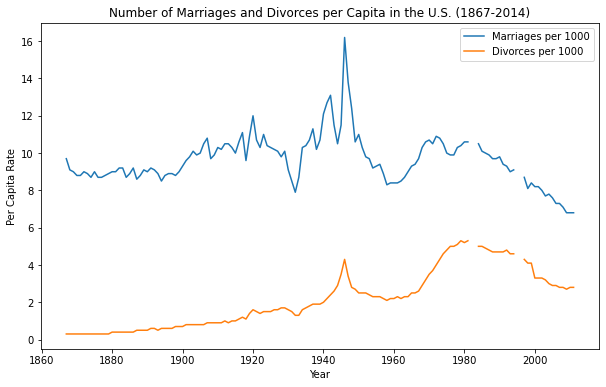

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

plt.figure(figsize=(10, 6))

plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000')

plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

plt.show()


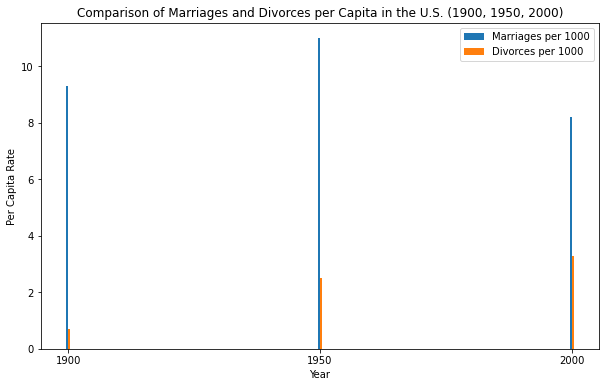

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("us-marriages-divorces-1867-2014.csv")
years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years)]
plt.figure(figsize=(10, 6))
plt.bar(filtered_data['Year'], filtered_data['Marriages_per_1000'], width=0.4, label='Marriages per 1000')
plt.bar(filtered_data['Year'] + 0.4, filtered_data['Divorces_per_1000'], width=0.4, label='Divorces per 1000')
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks(filtered_data['Year'] + 0.2, years)
plt.legend()
plt.show()

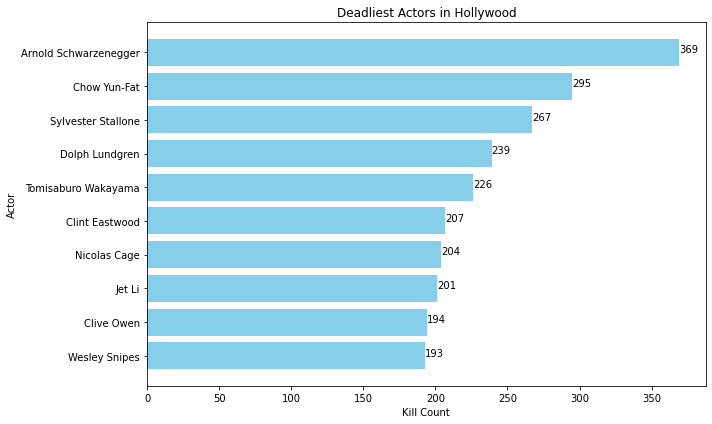

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("actor_kill_counts.csv")
sorted_data = data.sort_values(by='Count', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='skyblue')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.tight_layout()

for index, value in enumerate(sorted_data['Count']):
    plt.text(value, index, str(value))

plt.show()


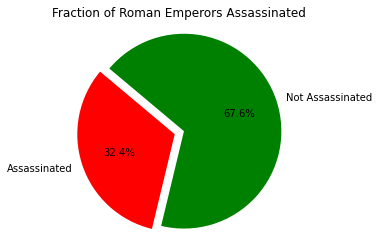

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("roman-emperor-reigns.csv")
assassinated_count = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]
non_assassinated_count = data.shape[0] - assassinated_count
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_count, non_assassinated_count]
colors = ['red', 'green']
explode = (0.1, 0)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal') 

plt.title('Fraction of Roman Emperors Assassinated')
plt.show()


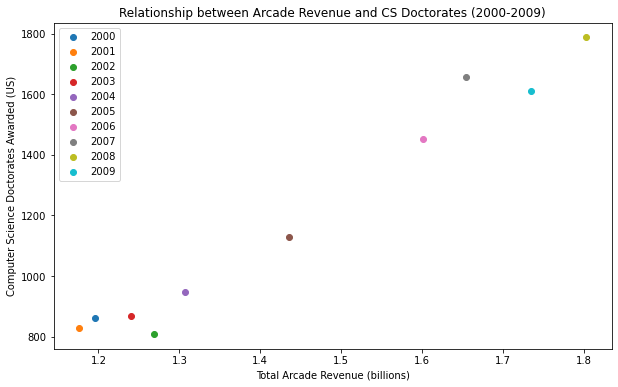

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
plt.figure(figsize=(10, 6))

for year in range(2000, 2010):
    year_data = data[data['Year'] == year]
    plt.scatter(year_data['Total Arcade Revenue (billions)'], year_data['Computer Science Doctorates Awarded (US)'], label=year)
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)')
plt.legend()
plt.show()
